#### Lets go through a data science pipeline through an example. 
It include 
    1. Data Collection
    2. Data preprocessing 
    3. Feature Engineering
    4. Model Training
    5. Model Validation
    6. Model Deployment

### 1.Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
cancer=pd.read_csv(r"D:\datas\project 2\Breast_cancer_data.csv")

In [2]:
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### 2.Preprocessing

In [3]:
cancer.info

<bound method DataFrame.info of      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0

In [4]:
cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
cancer.groupby('diagnosis').mean()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898
1,12.146524,17.914762,78.075406,462.790196,0.092478


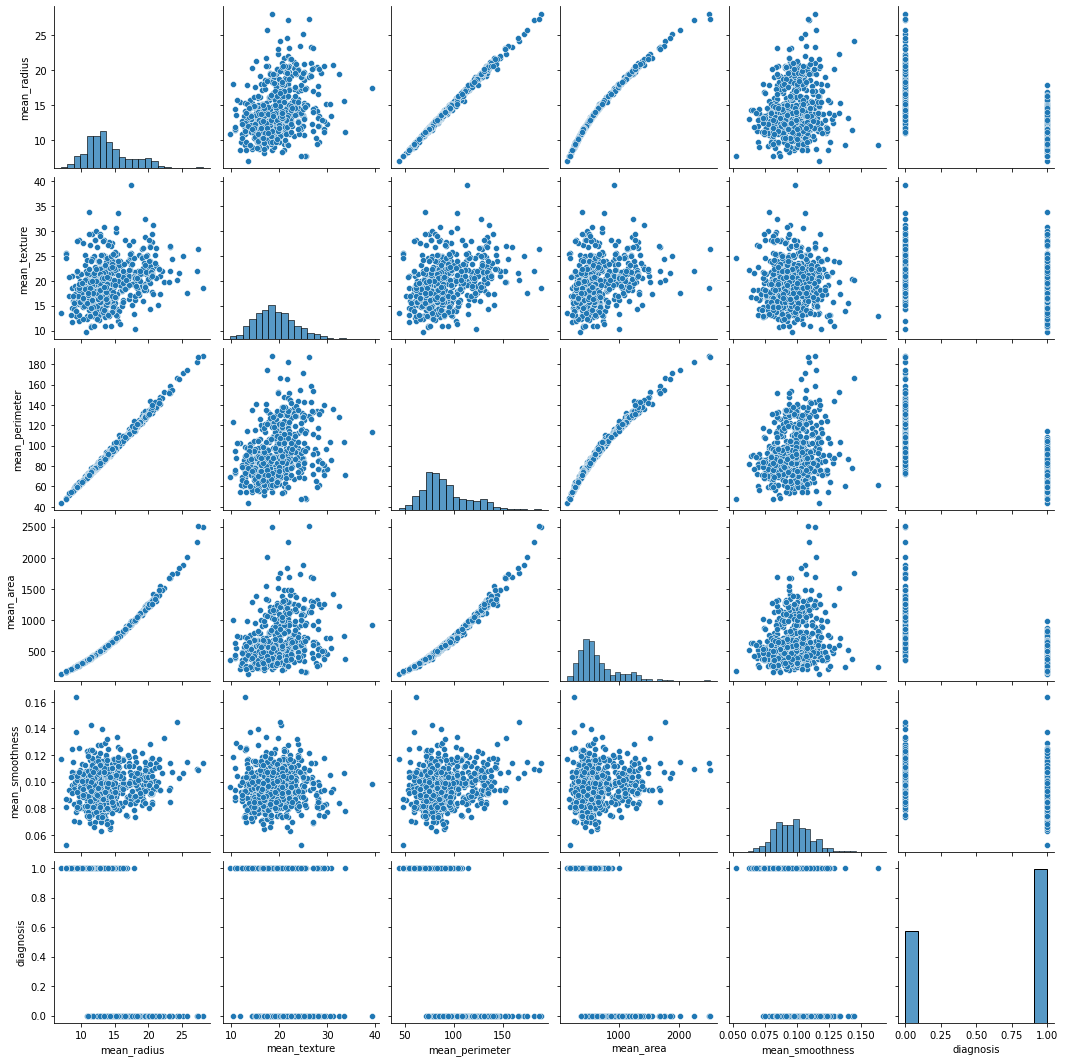

In [6]:
sn.pairplot(cancer)

In [7]:
cancer.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
corr_mat_diag=cancer.corr().round(2)
corr_mat_diag

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.00,0.32,1.00,0.99,0.17,-0.73
mean_texture,0.32,1.00,0.33,0.32,-0.02,-0.42
mean_perimeter,1.00,0.33,1.00,0.99,0.21,-0.74
mean_area,0.99,0.32,0.99,1.00,0.18,-0.71
mean_smoothness,0.17,-0.02,0.21,0.18,1.00,-0.36
diagnosis,-0.73,-0.42,-0.74,-0.71,-0.36,1.00


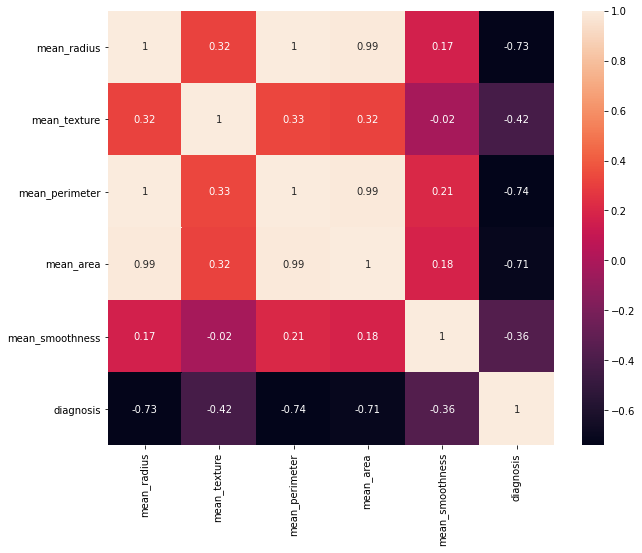

In [9]:
plt.figure(figsize=(10,8))
plot=sn.heatmap(corr_mat_diag,annot=True)

### 3.Feature engineering

Correlation matrix will give the idea radius ,area and perimeter are highly correlated .so we can reduce the dimension of data set for modelling.

In [10]:
cancer=cancer.drop(['mean_perimeter','mean_area'],axis='columns')
cancer

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


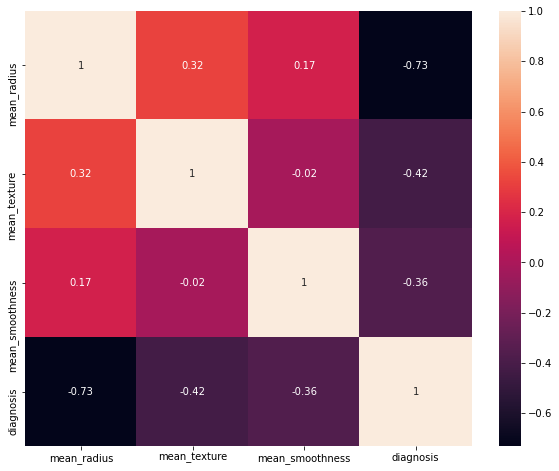

In [11]:
corr_mat_diag1=cancer.corr().round(2)
corr_mat_diag1
plt.figure(figsize=(10,8))
plot=sn.heatmap(corr_mat_diag1,annot=True)

### 4.Model Training

In [12]:
cancer.head(2)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0


In [13]:
X=cancer.drop('diagnosis',axis='columns')
Y=cancer[['diagnosis']]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [15]:
from sklearn.linear_model import LogisticRegression

cancer_model=LogisticRegression()

In [16]:
cancer_model.fit(x_train,y_train)

D:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [17]:
cancer_model.score(x_test,y_test)

0.9298245614035088

In [18]:
y_predicted=cancer_model.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[33,  5],
       [ 3, 73]], dtype=int64)

Text(69.0, 0.5, 'Truth')

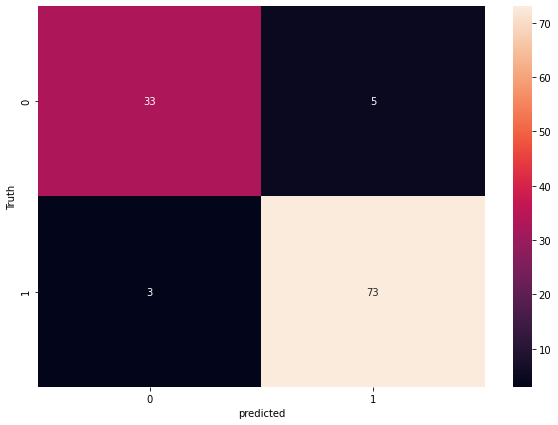

In [20]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')